<a href="https://colab.research.google.com/github/yashowardhansinghtomar/Adult_income/blob/main/Adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/adult.csv')

#About Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.groupby('income')['capital.loss'].count()

income
<=50K    24720
>50K      7841
Name: capital.loss, dtype: int64

#Imputation

In [ ]:
df.workclass.replace('?',df['workclass'].mode()[0],inplace=True)
df.occupation.replace('?',df['occupation'].mode()[0],inplace=True)
df['native.country'].replace('?',df['native.country'].mode()[0],inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<Axes: xlabel='income', ylabel='education.num'>

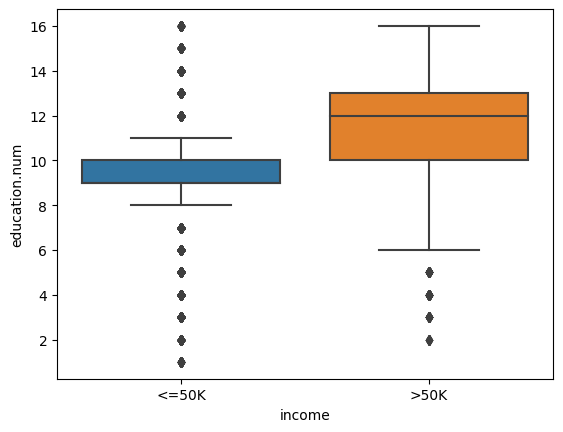

In [ ]:
import seaborn as sns
sns.boxplot(data=df, y='education.num', x='income')

<Axes: >

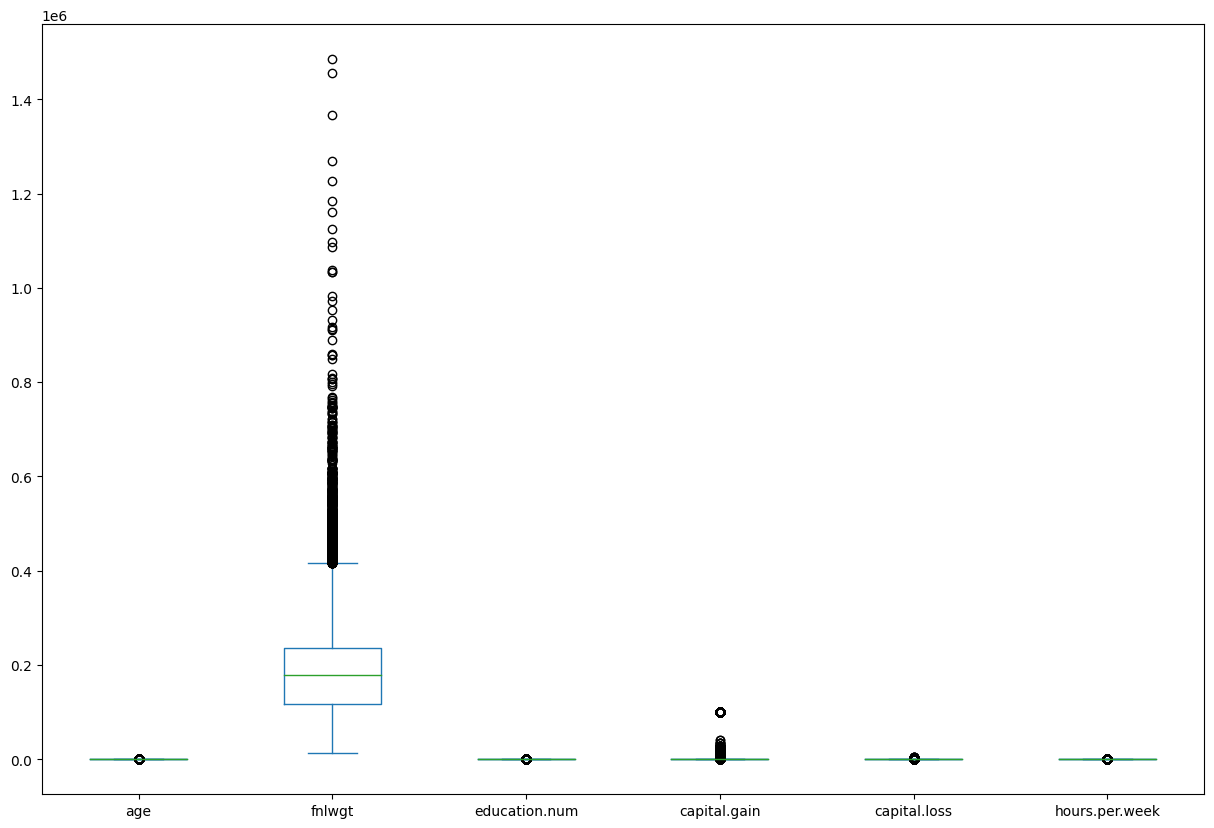

In [ ]:
df.plot(kind='box', layout=(3,3), figsize=(15,10))

In [ ]:
max_fnlwgt= ['fnlwgt'].quantile(0.95)

AttributeError: ignored

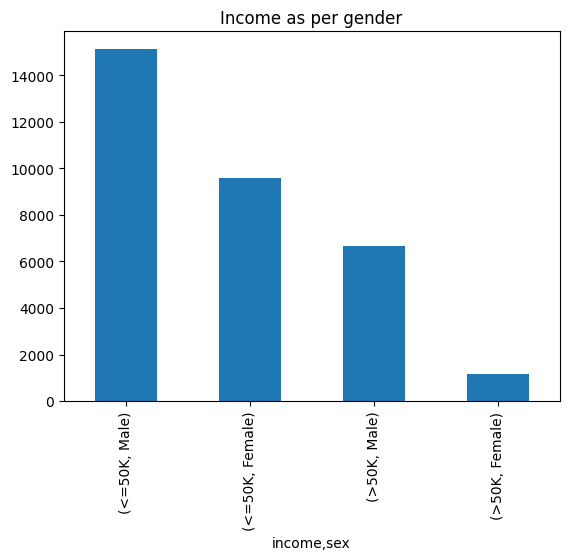

In [ ]:
import matplotlib.pyplot as plt
df.groupby('income').sex.value_counts().plot.bar()
plt.title('Income as per gender')
plt.show()

In [ ]:
df.groupby('income').occupation.value_counts()

income  occupation       
<=50K   Prof-specialty       3933
        Adm-clerical         3263
        Craft-repair         3170
        Other-service        3158
        Sales                2667
        Exec-managerial      2098
        Machine-op-inspct    1752
        Handlers-cleaners    1284
        Transport-moving     1277
        Farming-fishing       879
        Tech-support          645
        Protective-serv       438
        Priv-house-serv       148
        Armed-Forces            8
>50K    Prof-specialty       2050
        Exec-managerial      1968
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     250
        Protective-serv       211
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces            1
        Priv-house-serv         1
Name: occupation, dtyp

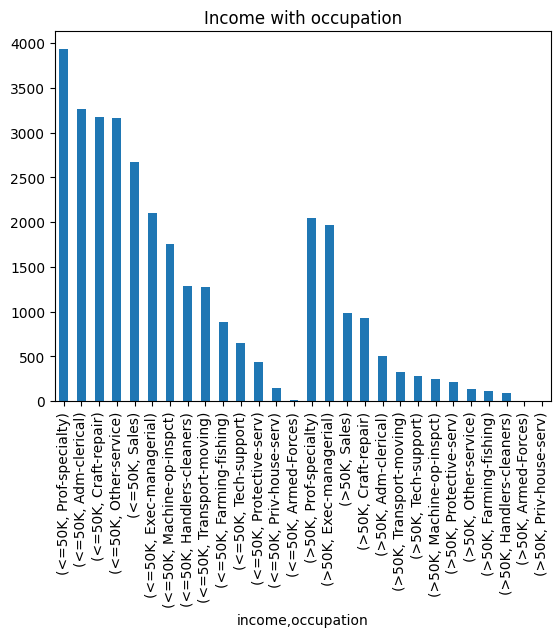

In [ ]:
df.groupby('income').occupation.value_counts().plot.bar()
plt.title('Income with occupation')
plt.show()

<ipython-input-40-828b6392ba0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

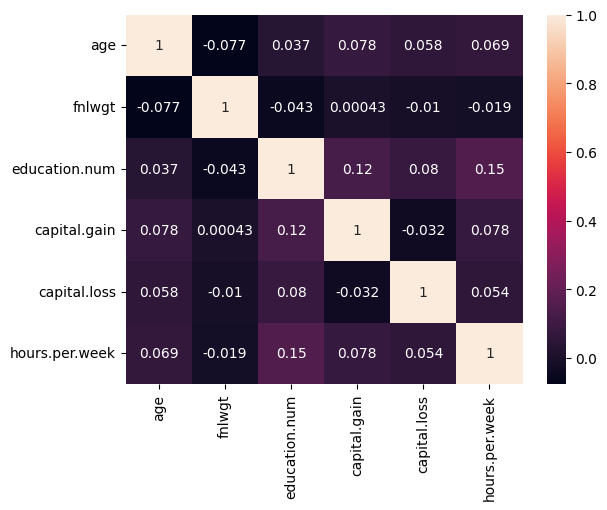

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

# Feature engineering
# handle cantegorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=45)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

LogisticRegression() :- 	 Accuracy = 0.81
GaussianNB() :- 	 Accuracy = 0.80
DecisionTreeClassifier() :- 	 Accuracy = 0.81
RandomForestClassifier() :- 	 Accuracy = 0.86
KNeighborsClassifier() :- 	 Accuracy = 0.78


In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6250
        >50K       0.74      0.62      0.67      1891

    accuracy                           0.86      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.86      0.86      8141



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5838,  412],
       [ 728, 1163]])

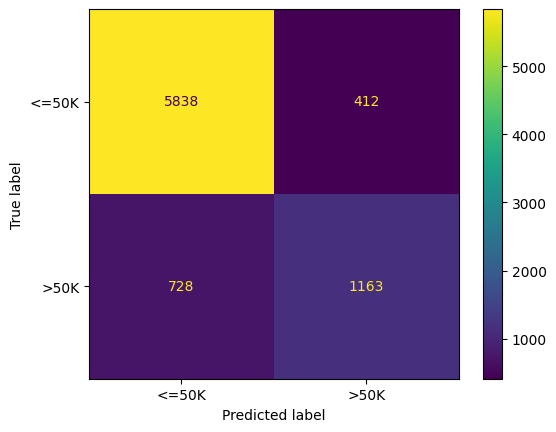

In [ ]:
ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K']).plot()